## Chapter 3 - Linear Regression

An Introduction to Statistical Learning and Elements of Statistical Learning are two valuable books in teaching concepts of statistical modeling related to data science and machine learning by the same authors and the same publisher. The latter is heavier on mathematical concepts.
R programming language is used throughout chapters in examples and modeling. I apply Python’s various packages to do the same.

In [1]:
%matplotlib inline 

import numpy as np      
import pandas as pd
import scipy.stats as stats

import matplotlib.pyplot as plt

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import statsmodels.api as sm

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

from matplotlib import rcParams

In [2]:
df = pd.read_csv('Advertising.csv')

In [3]:
df.keys()

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [4]:
df.shape

(200, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
df.head() #first 5 rows

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [7]:
df = df.drop(columns='Unnamed: 0') # droping first column
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [8]:
df.describe() # Basic info 

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


### Fitting Simple Linear Regression using SciPy

In [9]:
# Using Scipy for regression
x = df['TV']
y = df['sales']
slope, intercept, r, p, std_err = stats.linregress(x, y)
print(slope, intercept, r, std_err)

0.0475366404330197 7.032593549127702 0.7822244248616063 0.0026906071877968703


##### First number abobe is slope, 2nd: intercept, 3rd: r (for R2, must be squared), 4rth: standard error

<AxesSubplot:xlabel='TV', ylabel='sales'>

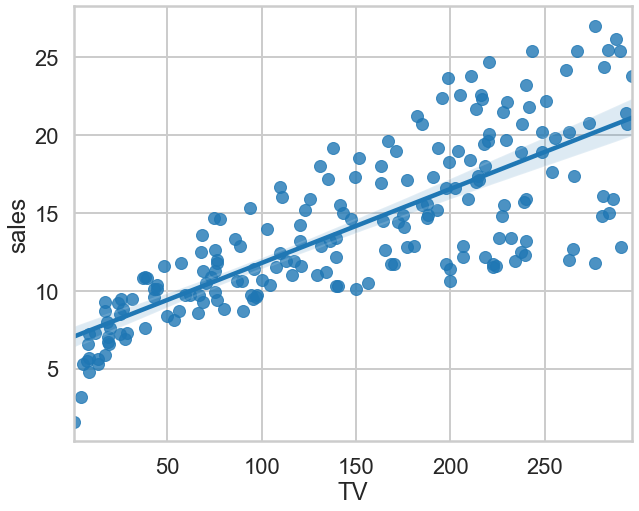

In [10]:
rcParams['figure.figsize'] = 10,8
sns.regplot(y="sales", x="TV", data=df, fit_reg = True)

### Simple Linear Regression using SciKit Learn

In [11]:
Radio = df[['radio']].values
sales = df[['sales']].values
x, y = Radio, sales
LinReg = LinearRegression()
LinReg.fit(x, y)
print(LinReg.intercept_, LinReg.coef_)
print(LinReg.score(x, y))

[9.3116381] [[0.20249578]]
0.33203245544529525


### Multiple Linear Regression using SciKit Learn

In [12]:
predictors = df[['TV', 'radio', 'newspaper']].values
sales = df[['sales']].values
x, y = predictors, sales
LinReg = LinearRegression()
LinReg.fit(x, y)
print(LinReg.intercept_, LinReg.coef_)

[2.93888937] [[ 0.04576465  0.18853002 -0.00103749]]


In [13]:
LinReg.score(x,y) # R^2

0.8972106381789522

### Fitting Linear Regression using statsmodels

In [14]:
# Import regression modules
# ols - stands for Ordinary least squares, we'll use this
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [15]:
mod = ols('sales ~ TV + radio + newspaper', df).fit()
print (mod.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 07 Sep 2020   Prob (F-statistic):           1.58e-96
Time:                        10:53:59   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0